In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt

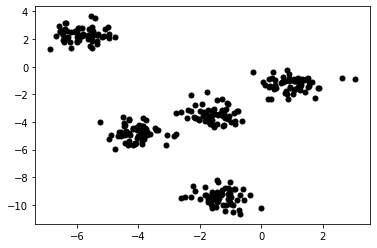

In [2]:
from sklearn.datasets import make_blobs
X,y = make_blobs(
    n_samples=300,
    n_features=2,
    centers=5,
    cluster_std=0.5,
    shuffle=True,
    random_state=2,
)

plt.figure()
plt.scatter(X[:,0],X[:,1],c='black',marker='o',s=25)

In [3]:
from sklearn.cluster import KMeans

In [4]:
km = KMeans(
            n_clusters=5,
            init='random',
            n_init=10,
            max_iter=300,
            tol=0.0001,
            random_state=0)

In [5]:
y_km=km.fit_predict(X)

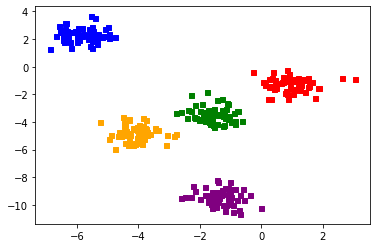

In [6]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='green',marker='s',s=25,label='Cluster 0')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='s',s=25,label='Cluster 1')
plt.scatter(X[y_km==2,0],X[y_km==2,1],c='blue',marker='s',s=25,label='Cluster 2')
plt.scatter(X[y_km==3,0],X[y_km==3,1],c='red',marker='s',s=25,label='Cluster 3')
plt.scatter(X[y_km==4,0],X[y_km==4,1],c='purple',marker='s',s=25,label='Cluster 4')

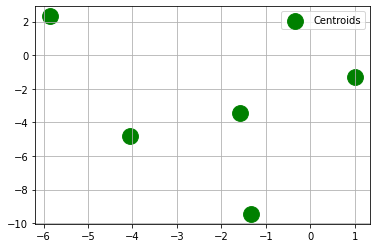

In [7]:
plt.scatter(km.cluster_centers_[:,0],
            km.cluster_centers_[:,1],
            c='green',marker='o',s=250,label='Centroids')
plt.legend()
plt.grid()
plt.show()

# Searching for number of clusters using sum of squared error (SSE)

$ SSE  = \sum_{i=1}^n \sum_{j=1}^k w^{(i,j)} \| x^{(i)}-\mu^{(j)} \| ^2 _2$

$ w^{(i,j)} = 1 $ if sample $x^{(i)}$ is in cluster $j$, $ w^{(i,j)} = 0 $ if is not.

In [8]:
print('SSE=',km.inertia_) #current SSE with 5 centroids

SSE= 156.59509928866845


In [9]:
SSE=[]
for i in range (1,11):
    km = KMeans(
            n_clusters=i,
            init='random',
            n_init=10,
            max_iter=300,
            tol=0.0001,
            random_state=0)
    km.fit(X)
    SSE.append(km.inertia_)

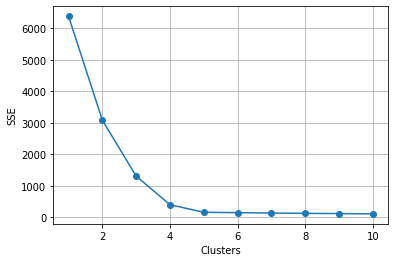

In [10]:
plt.figure()
plt.plot(range(1,11), SSE, marker='o')
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.grid()

# Compare cluster algorithms ontwo half circles dataset

In [11]:
from sklearn.datasets import make_moons

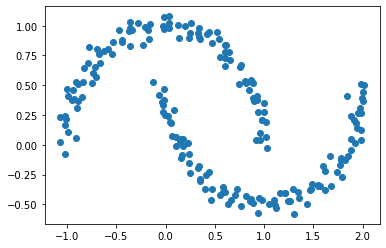

In [12]:
X, y = make_moons(n_samples=200,noise=0.05,random_state=0)
plt.figure()
plt.scatter(X[:,0],X[:,1])

In [13]:
km=KMeans(n_clusters=2, random_state=0)

In [14]:
y_km=km.fit_predict(X)

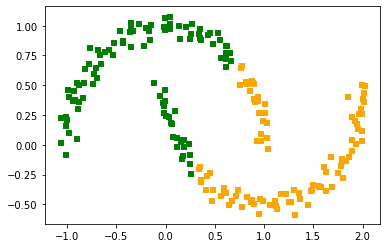

In [15]:
plt.scatter(X[y_km==0,0],X[y_km==0,1],c='green',marker='s',s=25,label='Cluster 0')
plt.scatter(X[y_km==1,0],X[y_km==1,1],c='orange',marker='s',s=25,label='Cluster 1')

In [16]:
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=2, affinity='euclidean',linkage='complete')

In [17]:
y_ac=ac.fit_predict(X)

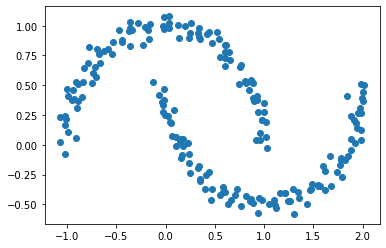

In [18]:
plt.figure()
plt.scatter(X[:,0],X[:,1])

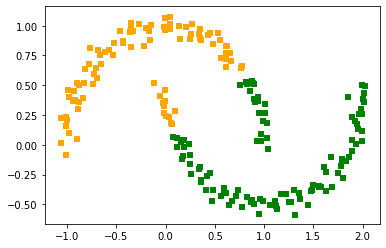

In [19]:
plt.scatter(X[y_ac==0,0],X[y_ac==0,1],c='green',marker='s',s=25,label='Cluster 0')
plt.scatter(X[y_ac==1,0],X[y_ac==1,1],c='orange',marker='s',s=25,label='Cluster 1')

In [20]:
from sklearn.cluster import DBSCAN
db=DBSCAN(eps=0.2, min_samples=6, metric='euclidean')

In [21]:
y_db=db.fit_predict(X)

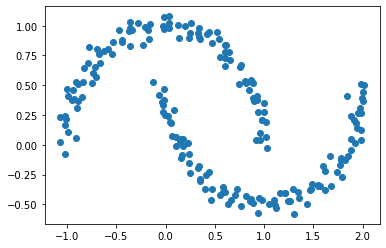

In [22]:
plt.figure()
plt.scatter(X[:,0],X[:,1])

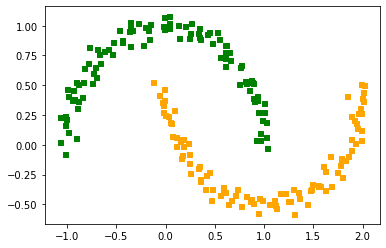

In [23]:
plt.scatter(X[y_db==0,0],X[y_db==0,1],c='green',marker='s',s=25,label='Cluster 0')
plt.scatter(X[y_db==1,0],X[y_db==1,1],c='orange',marker='s',s=25,label='Cluster 1')

# Cluster tree

In [24]:
import pandas as pd

In [25]:
variables = ['OX','OY','OZ']
labels=['ID_0','ID_1','ID_2','ID_3','ID_4','ID_5']

In [26]:
X=np.random.random_sample([6,3])*10

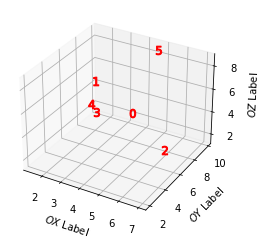

In [27]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in range(0,6):
    ax.scatter(X[i,0], X[i,1], X[i,2], c='r', s=75, marker='$'+str(i)+'$')

ax.set_xlabel('$OX$ Label')
ax.set_ylabel('$OY$ Label')
ax.set_zlabel('$OZ$ Label')

plt.show()

In [28]:
data = pd.DataFrame(X,columns=variables, index=labels)
data

,OX,OY,OZ
ID_0,4.813500,6.077103,5.196495
ID_1,2.921313,5.961462,7.168759
ID_2,6.953123,4.840672,3.860642
ID_3,1.402351,9.455094,1.633502
ID_4,4.411679,2.050713,8.140182
ID_5,4.675924,9.785452,8.535985


In [29]:
from scipy.spatial.distance import pdist, squareform
row_dist = pd.DataFrame(squareform(pdist(data, metric='euclidean')),
                       columns=labels, index = labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4,ID_5
ID_0,0.000000,2.735611,2.809137,5.978434,5.003855,4.992291
ID_1,2.735611,0.000000,5.334350,6.719507,4.296372,4.423897
ID_2,2.809137,5.334350,0.000000,7.554079,5.705898,7.176023
ID_3,5.978434,6.719507,7.554079,0.000000,10.306202,7.646547
ID_4,5.003855,4.296372,5.705898,10.306202,0.000000,7.749366
ID_5,4.992291,4.423897,7.176023,7.646547,7.749366,0.000000


In [30]:
from scipy.cluster.hierarchy import linkage
row_clusters=linkage(X, method='complete',metric='euclidean')

In [31]:
pd.DataFrame(row_clusters,
            columns=['Label of row I',
                     'Label of row II',
                      'Distance',
                      'Number of cluster elemenmts'],
            index=['Cluster  %d' %(i+1) for i in range (row_clusters.shape[0])])

,Label of row I,Label of row II,Distance,Number of cluster elemenmts
Cluster 1,0.0,1.0,2.735611,2.0
Cluster 2,5.0,6.0,4.992291,3.0
Cluster 3,2.0,4.0,5.705898,2.0
Cluster 4,3.0,7.0,7.646547,4.0
Cluster 5,8.0,9.0,10.306202,6.0


Text(0, 0.5, 'Eucleidean distance')

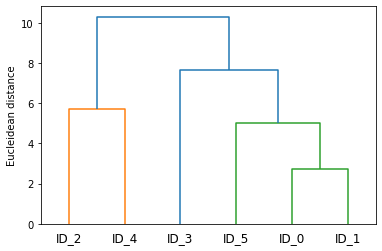

In [32]:
from scipy.cluster.hierarchy import dendrogram
fig = plt.figure()
row_dendr = dendrogram(row_clusters,labels=labels)
plt.ylabel('Eucleidean distance')

[Text(0, 0.0, 'ID_1'),
 Text(0, 1.0, 'ID_0'),
 Text(0, 2.0, 'ID_5'),
 Text(0, 3.0, 'ID_3'),
 Text(0, 4.0, 'ID_4'),
 Text(0, 5.0, 'ID_2')]

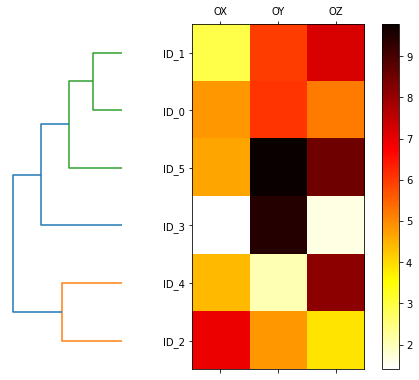

In [33]:
fig=plt.figure(figsize=(8,8), facecolor='white')
axd=fig.add_axes([0.09,0.1,0.2,0.6])
row_dendr=dendrogram(row_clusters,orientation='left')
data_rowclust=data.iloc[row_dendr['leaves'][::-1]]
axm=fig.add_axes([0.23,0.1,0.6,0.6])
cax=axm.matshow(data_rowclust, interpolation='nearest',cmap='hot_r')
axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)    
axm.set_xticks(axm.get_xticks().tolist()[1:4])
axm.set_xticklabels(list(data_rowclust.columns))
axm.set_yticks(axm.get_yticks().tolist()[1:7])
axm.set_yticklabels(list(data_rowclust.index))